In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 1024
MOMENTUM = 0.95

# 範例
Focal loss for multi-classification

$FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)$

In [9]:
import tensorflow as tf
import keras.backend as K

def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1e-8
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        
        ce = tf.multiply(y_true, -tf.log(model_out))
        
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
    return focal_loss_fixed

In [10]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss=focal_loss(), metrics=['accuracy'], optimizer=optimizer)

model.fit(x_train, y_train,
         epochs=EPOCHS,
         batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True)

# Collection results
train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']

W0803 18:45:19.321982  5808 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 18:45:19.376049  5808 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 18:45:19.391730  5808 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 18:45:19.524127  5808 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

W0803 18:45:20.282968  5808 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 136us/step - loss: 6.0406 - acc: 0.3333 - val_loss: 6.2535 - val_acc: 0.3462
Epoch 2/25
50000/50000 [==============================] - 3s 59us/step - loss: 4.3790 - acc: 0.4443 - val_loss: 4.9267 - val_acc: 0.3968
Epoch 3/25
50000/50000 [==============================] - 3s 59us/step - loss: 3.9835 - acc: 0.4803 - val_loss: 4.4931 - val_acc: 0.4356
Epoch 4/25
50000/50000 [==============================] - 3s 59us/step - loss: 3.7196 - acc: 0.5074 - val_loss: 4.3201 - val_acc: 0.4444
Epoch 5/25
50000/50000 [==============================] - 3s 59us/step - loss: 3.5130 - acc: 0.5270 - val_loss: 4.1466 - val_acc: 0.4559
Epoch 6/25
50000/50000 [==============================] - 3s 58us/step - loss: 3.3150 - acc: 0.5485 - val_loss: 4.1044 - val_acc: 0.4651
Epoch 7/25
50000/50000 [==============================] - 3s 59us/step - loss: 3.1541 - acc: 0.5658 - val_loss: 4.0323 - val_ac

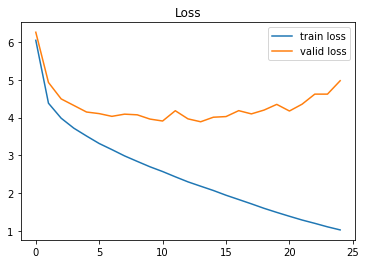

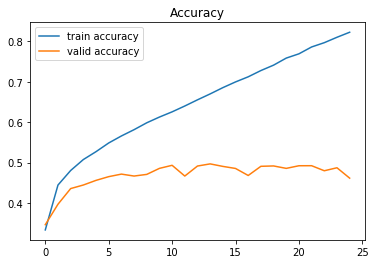

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Hpmework
1. 請自行定義一個 loss function, 為 0.3 * focal loss + 0.7 cross-entropy，訓練並比較結果

$FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)$

In [11]:
import tensorflow as tf
import keras.backend as K

def focal_loss(y_true, y_pred,gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    epsilon = 1e-8
    y_true = tf.convert_to_tensor(y_true, tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, tf.float32)

    model_out = tf.add(y_pred, epsilon)
    ce = tf.multiply(y_true, -tf.log(model_out))
    weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
    fl = tf.multiply(alpha, tf.multiply(weight, ce))
    reduced_fl = tf.reduce_max(fl, axis=1)
    return tf.reduce_mean(reduced_fl)

def cross_entropy(y_true, y_pred):         
    y_true = tf.convert_to_tensor(y_true, tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, tf.float32)
            
    entropy = tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = y_pred)
    return tf.reduce_mean(entropy)


def combined_loss(W1=0.3,W2=0.7):    
    def combined_loss_fixed(y_true, y_pred):
        f_loss = focal_loss(y_true, y_pred)
        cr = cross_entropy(y_true, y_pred)
        conbin_loss = f_loss * W1 + cr * W2
        return conbin_loss
    return combined_loss_fixed

ce_weights_list = [0., 0.3, 0.5, 0.7, 1]

In [12]:
import itertools
results = {}

for i, ce_w in enumerate(ce_weights_list):
    keras.backend.clear_session()
    print("Numbers of exp: %i, ce_weight: %.2f" % (i, ce_w))

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    """
    TO DO:
    Compile your model with customized loss
    """
    model.compile(loss = combined_loss(), metrics = ['accuracy'], optimizer = optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True
             )
    
    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

W0803 19:23:00.710762 11552 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 19:23:00.713748 11552 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Numbers of exp: 0, ce_weight: 0.00


W0803 19:23:01.064852 11552 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0803 19:23:01.080496 11552 deprecation.py:323] From <ipython-input-11-459e89a3602e>:22: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W0803 19:23:01.248529 11552 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broad

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 3s 57us/step - loss: 2.2649 - acc: 0.6036 - val_loss: 2.6890 - val_acc: 0.4757
Epoch 15/25
50000/50000 [==============================] - 3s 58us/step - loss: 2.2311 - acc: 0.6152 - val_loss: 2.6860 - val_acc: 0.4779
Epoch 16/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.2032 - acc: 0.6234 - val_loss: 2.6648 - val_acc: 0.4858
Epoch 17/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.1676 - acc: 0.6352 - val_loss: 2.6607 - val_acc: 0.4890
Epoch 18/25
50000/50000 [==============================] - 3s 58us/step - loss: 2.1391 - acc: 0.6430 - val_loss: 2.6688 - val_acc: 0.4852
Epoch 19/25
50000/50000 [==============================] - 3s 57us/step - loss: 2.1086 - acc: 0.6542 - val_loss: 2.6859 - val_acc: 0.4855
Epoch 20/25
50000/50000 [==============================] - 3s 62us/step - loss: 2.0809 - acc: 0.6625 - val_loss: 2.6771 - val_acc: 0.4831
Epoch 21/25
50000/50000 [=====================

50000/50000 [==============================] - 3s 61us/step - loss: 2.9685 - acc: 0.4093 - val_loss: 3.0531 - val_acc: 0.3882
Epoch 3/25
50000/50000 [==============================] - 3s 65us/step - loss: 2.8094 - acc: 0.4490 - val_loss: 2.9714 - val_acc: 0.4030
Epoch 4/25
50000/50000 [==============================] - 3s 67us/step - loss: 2.7125 - acc: 0.4745 - val_loss: 2.8480 - val_acc: 0.4303
Epoch 5/25
50000/50000 [==============================] - 3s 70us/step - loss: 2.6416 - acc: 0.4937 - val_loss: 2.8077 - val_acc: 0.4410
Epoch 6/25
50000/50000 [==============================] - 3s 66us/step - loss: 2.5822 - acc: 0.5105 - val_loss: 2.7778 - val_acc: 0.4526
Epoch 7/25
50000/50000 [==============================] - 3s 62us/step - loss: 2.5278 - acc: 0.5274 - val_loss: 2.7437 - val_acc: 0.4559
Epoch 8/25
50000/50000 [==============================] - 3s 65us/step - loss: 2.4850 - acc: 0.5368 - val_loss: 2.7162 - val_acc: 0.4626
Epoch 9/25
50000/50000 [============================

50000/50000 [==============================] - 3s 67us/step - loss: 1.9224 - acc: 0.7151 - val_loss: 2.6808 - val_acc: 0.4961


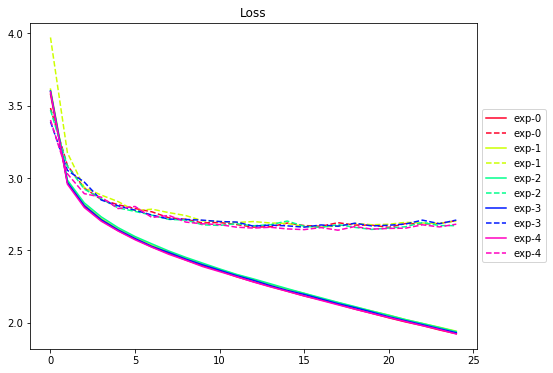

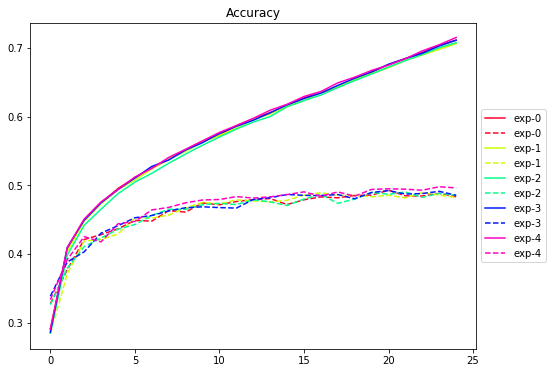

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()